In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
from celluloid import Camera
from IPython.display import HTML

In [2]:
X = np.array([[np.random.uniform(low=100, high=500), np.random.uniform(low=100, high=500)] for i in range(1000)])

In [3]:
X_1 = X[X[:, 0]>X[:, 1] + 30]

In [4]:
X_2 = X[X[:, 0]<X[:, 1] - 30]

In [5]:
X = np.concatenate((X_1, X_2), axis=0)

In [6]:
y = np.concatenate((np.ones(X_1.shape[0]), np.zeros(X_2.shape[0])), axis=0)

In [7]:
X.shape, y.shape

((842, 2), (842,))

Text(0.5, 1.0, 'Randomly generated dataset, total size = 842')

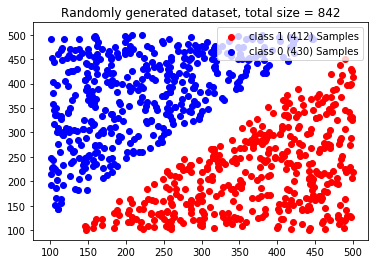

In [8]:
plt.scatter(X_1[:, 0], X_1[:, 1], color='red')
plt.scatter(X_2[:, 0], X_2[:, 1], color='blue')
plt.legend(['class 1 ('+str(X_1.shape[0])+') Samples', 'class 0 ('+str(X_2.shape[0])+') Samples'])
plt.title('Randomly generated dataset, total size = '+str(X.shape[0]))

In [9]:
def sigmoid(z):
    #print('z = ', z)
    return 1/(1 + np.exp(-z))

In [10]:
class Hypothesis:
    def __init__(self, weights):
        self.W = np.array(weights[1:])
        self.b = weights[0]
        
    def __call__(self, X):
        return sigmoid(np.dot(X, self.W) + self.b)
    
    def setWeights(self, weights):
        self.W = np.array(weights[1:])
        self.b = weights[0]

In [11]:
#17.29002068036747 [ 0.3423235 -5.3579992] 9.993738014617733
#h = Hypothesis([10, 2, -3])

In [12]:
h = Hypothesis([10, 2, -1])

In [13]:
hX_1 = X[h(X) > 0.5]

In [14]:
hX_2 = X[h(X) <= 0.5]

Text(0.5, 1.0, 'Estimation using Logistic Regression')

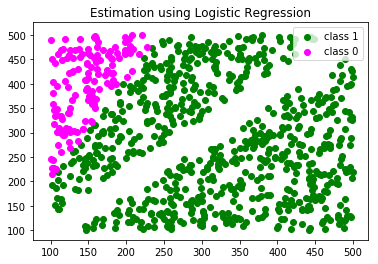

In [15]:
plt.scatter(hX_1[:, 0], hX_1[:, 1], color='green')
plt.scatter(hX_2[:, 0], hX_2[:, 1], color='magenta')
plt.legend(['class 1', 'class 0'])
plt.title('Estimation using Logistic Regression')

In [16]:
def crossEntropy(X, y, H):
    return - (1/X.shape[0]) * np.sum(y*np.log(H(X)+1e-25) + (1-y)*np.log(1-H(X)+1e-25), axis=0)

In [17]:
crossEntropy(X, y, h)

18.60399267948846

In [18]:
def d_ce_dw(X, y, H, i):
    return (1/X.shape[0])*np.dot(X[:, i].T, H(X) - y)

In [19]:
def d_ce_db(X, y, H):
    return (1/X.shape[0])*np.sum(H(X) - y, axis=0)

In [20]:
def SGD(alpha, X, Y, H, ce, d_ce_db, d_ce_dw):
    loss = np.array([ce(X, Y, H)])
    weights = []
    for i in range(100):
        b = H.b - alpha*d_ce_db(X, Y, H)
        w1 = H.W[0] - alpha*d_ce_dw(X, Y, H, 0)
        w2 = H.W[1] - alpha*d_ce_dw(X, Y, H, 1)
        
        H.setWeights([b, w1, w2])
        loss = np.append(loss, [ce(X, Y, H)], axis=0)
        
        if i % 10 == 0:
            weights.append([b, w1, w2])
    return loss, weights

In [21]:
loss, weights = SGD(0.0001, X, y, h, crossEntropy, d_ce_db, d_ce_dw)

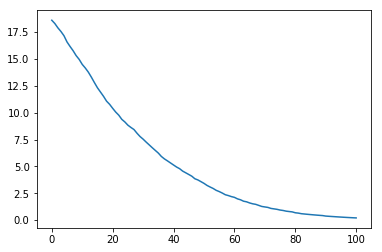

In [22]:
plt.plot(loss)

In [23]:
hX_1 = X[h(X) > 0.5]
hX_2 = X[h(X) <= 0.5]

Text(0.5, 1.0, 'Estimation using Logistic Regression')

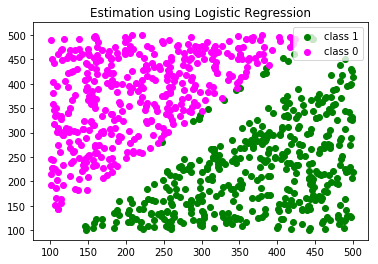

In [24]:
plt.scatter(hX_1[:, 0], hX_1[:, 1], color='green')
plt.scatter(hX_2[:, 0], hX_2[:, 1], color='magenta')
plt.legend(['class 1', 'class 0'])
plt.title('Estimation using Logistic Regression')

### 100% Accuracy not achieved on purpose. Update Learning, and increase the number of epochs. Which one is better?

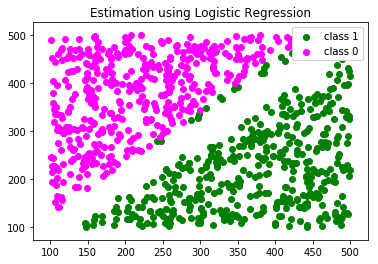

In [32]:
fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    h.setWeights(weights[i])
    hX_1 = X[h(X) > 0.5]
    hX_2 = X[h(X) <= 0.5]
    plt.scatter(hX_1[:, 0], hX_1[:, 1], color='green')
    plt.scatter(hX_2[:, 0], hX_2[:, 1], color='magenta')
    plt.legend(['class 1', 'class 0'])
    plt.title('Estimation using Logistic Regression')
    camera.snap()
anim = camera.animate(interval=500,blit=True)
HTML(anim.to_html5_video())